In [38]:
from task_offloading_moo.pymoo.algorithms.puma_optimizer import PumaOptimizer
from task_offloading_moo.pymoo.problem import TaskOffloadingProblem
from task_offloading_moo.pymoo.operators.repair import TaskOffloadingRepair
from task_offloading_moo.pymoo.operators.sampling import TaskOffloadingSampling
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

In [39]:
pop_size = 100
n_max_iters = 50

num_cloud_machines = 30
num_fog_machines = 20
num_tasks = 500

algorithm = PumaOptimizer(repair=TaskOffloadingRepair(),
                      use_soft_repair=True,
                      pop_size=pop_size,
                      sampling=TaskOffloadingSampling(),
                      n_max_iters=n_max_iters,
                      archive_size=100,
                      save_history=True,
                      )

problem = TaskOffloadingProblem(num_cloud_machines, num_fog_machines, num_tasks, use_random_machines=True)

In [40]:
res = minimize(problem,
           algorithm,
           seed=1,
           verbose=True)

n_gen  |  n_eval  |     explor    |    exploit    |   is_explore  | n_nds  |      eps      |   indicator  
     1 |      100 |             0 |             0 |            no |      9 |             - |             -
     2 |      100 |  4.292658E+01 |  8.009593E+01 |            no |     13 |  0.0114906303 |             f
     3 |      100 |  1.686758E+02 |  3.326394E+02 |            no |     13 |  0.000000E+00 |             f
     4 |      100 |  1.2108869780 |  7.482946E-17 |           yes |     14 |  0.0262352901 |             f
     5 |      102 |  6.605275E-18 |  0.3690494666 |            no |     14 |  0.000000E+00 |             f
     6 |      102 |  0.3690494666 |  6.659878E+01 |            no |     14 |  0.000000E+00 |             f
     7 |      102 |  1.1071483998 |  3.329939E+01 |            no |     13 |  0.0093379266 |         ideal
     8 |      102 |  2.2142967997 |  3.044658E+01 |            no |     13 |  0.000000E+00 |             f
     9 |      102 |  2.7726959675 |  

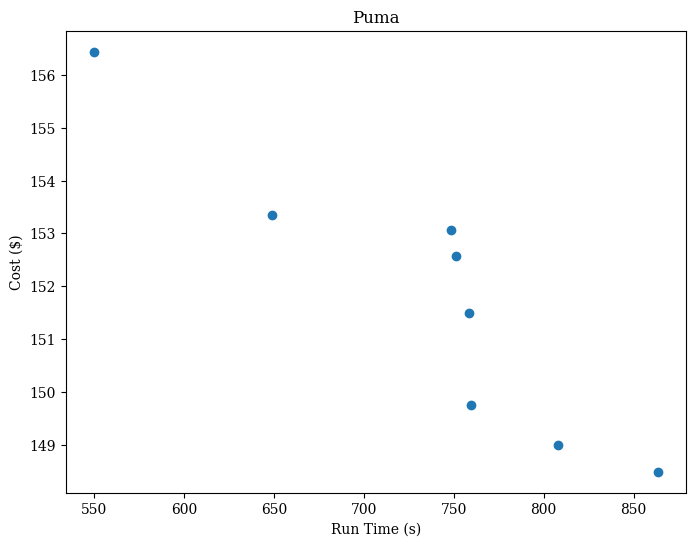

In [41]:
# print(f"Best population found:\n {res.X} \nwith F:\n{res.F}")

plot = Scatter(title="Puma")
plot.add(res.F)
plot.axis_labels = problem.dataset_generator.get_objective_names()
_ = plot.show()

In [42]:
# res.archive.get("F")

In [ ]:
from pyrecorder.recorder import Recorder
from pyrecorder.writers.video import Video
import os

out_path = os.path.join(os.path.dirname(os.getcwd()), "output")
os.makedirs(out_path, exist_ok=True)
with Recorder(Video(os.path.join(out_path, "video.mp4"))) as rec:

    # for each algorithm object in the history
    for entry in res.history:
        sc = Scatter(title=("Gen %s" % entry.n_gen))
        sc.add(entry.opt.get("F"))
        sc.add(entry.problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
        sc.do()

        # finally record the current visualization to the video
        rec.record()

In [ ]:
# plot = Scatter(title="Puma")
# plot.add(res.archive.get("F"))
# plot.axis_labels = problem.dataset_generator.get_objective_names()
# _ = plot.show()